In [57]:
import tensorflow as tf
import pandas as pd
import jieba
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.contrib import layers
from collections import Counter
import tqdm

In [2]:
#load data
test = pd.read_csv('./data/bert_test.txt',delimiter='\t',names=["label","review"])
val = pd.read_csv('./data/bert_val.txt',delimiter='\t',names=["label","review"])
train = pd.read_csv('./data/bert_train.txt',delimiter='\t',names=["label","review"])

#load data
#x_test = test.review
#y_test = test.label
#x_train = train.review
#y_train = train.label

In [3]:
x_test_pos = []
x_test_neg = []
for i in range(0,3000):
    if test.label[i] == 2:
        x_test_pos.append(test.review[i])
    if test.label[i] == 0:
        x_test_neg.append(test.review[i])

In [4]:
x_train_pos = []
x_train_neg = []
for i in range(0,18000):
    if train.label[i] == 2:
        x_train_pos.append(train.review[i])
    if train.label[i] == 0:
        x_train_neg.append(train.review[i])

In [5]:
x_train = np.concatenate((x_train_pos, x_train_pos), axis=0)

### 构建字典

In [6]:
def get_words(txt):
    c = Counter()
    for item in txt:
        seg_list = jieba.cut(item)
        for x in seg_list:
            if len(x)>1 and x != '\r\n':
                c[x] += 1
                
        
    return c

In [7]:
c=get_words(x_train)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/vr/3b_f9c5j0yvgq7_41pp6_ktm0000gn/T/jieba.cache
Loading model cost 1.014 seconds.
Prefix dict has been built succesfully.


In [12]:
sorted(c.most_common(), key=lambda x: x[1])

[('4X', 2),
 ('B5', 2),
 ('行用', 2),
 ('返款', 2),
 ('玩具', 2),
 ('到手', 2),
 ('急性子', 2),
 ('一小', 2),
 ('高些', 2),
 ('gdbai', 2),
 ('花型', 2),
 ('hahah', 2),
 ('壶口', 2),
 ('整个', 2),
 ('亲多大', 2),
 ('年龄', 2),
 ('不厌其烦', 2),
 ('兰花', 2),
 ('手链', 2),
 ('get', 2),
 ('一刀', 2),
 ('有行', 2),
 ('庭好', 2),
 ('发到', 2),
 ('大方', 2),
 ('万条', 2),
 ('见证', 2),
 ('澳门', 2),
 ('永利', 2),
 ('国际', 2),
 ('娱乐', 2),
 ('品牌', 2),
 ('在线', 2),
 ('彩种', 2),
 ('多画面', 2),
 ('提现', 2),
 ('腾讯', 2),
 ('北京', 2),
 ('赛车', 2),
 ('幸运', 2),
 ('飞艇', 2),
 ('福彩', 2),
 ('浏览', 2),
 ('邀请', 2),
 ('113608', 2),
 ('老牌子', 2),
 ('格局', 2),
 ('投资', 2),
 ('风险', 2),
 ('技术推广', 2),
 ('工资', 2),
 ('日结', 2),
 ('周入', 2),
 ('欧克', 2),
 ('江野', 2),
 ('新生', 2),
 ('孩帮', 2),
 ('牙刷', 2),
 ('熟人', 2),
 ('两合', 2),
 ('瘦瘦', 2),
 ('塑身', 2),
 ('酵素', 2),
 ('1600', 2),
 ('vr', 2),
 ('亲切', 2),
 ('叮嘱', 2),
 ('检验', 2),
 ('萌宝', 2),
 ('樱花', 2),
 ('断带', 2),
 ('七盒', 2),
 ('哈祝', 2),
 ('尝试', 2),
 ('票据', 2),
 ('没买成', 2),
 ('说明书', 2),
 ('被单', 2),
 ('沐浴露', 2),
 ('后来', 2),
 ('就认', 2),
 ('出

In [15]:
def dividesentence(a):
    sentence = []
    seg_list = jieba.cut(a, cut_all=True)
    for item in seg_list:
        sentence.append(item)
    return sentence

In [16]:
split_list=[]
for item in x_train:
    a=dividesentence(item)
    split_list.append(a)

In [17]:
# 初始化两个token：pad和unk
vocab = ["<pad>", "<unk>"]

# 去除出现频次为1次的单词
# 去除出现频次为1次的单词
for w, f in c.most_common():
    if f > 1:
        vocab.append(w)

In [18]:
print("The total size of our vocabulary is: {}".format(len(vocab)))

The total size of our vocabulary is: 4116


In [19]:
vocab

['<pad>',
 '<unk>',
 '谢谢',
 '好评',
 '五星',
 '下次',
 'OK',
 '不错',
 '东西',
 '网页',
 '收到',
 '发货',
 '一定',
 '上次',
 '你家',
 '下单',
 '质量',
 '可以',
 '微信',
 '号码',
 '已经',
 '之前',
 '一个',
 '满意',
 '生意兴隆',
 '还会',
 '喜欢',
 '老板',
 '不过',
 '尽快',
 '购买',
 '收藏',
 '非常',
 '希望',
 '产品',
 '的话',
 '亲亲',
 '光顾',
 '朋友',
 '继续',
 '不好意思',
 '好吃',
 '回购',
 '一下',
 '感谢',
 '效果',
 '买过',
 '以后',
 '快递',
 '衣服',
 '还来',
 '记得',
 '真的',
 '需要',
 '我会',
 '你们',
 '推荐',
 '今天',
 '你好',
 '备注',
 '我们',
 '检查',
 '晒图',
 '如果',
 '感觉',
 '介绍',
 '争取',
 '中通',
 '不用',
 '谢谢您',
 '这个',
 '店铺',
 '一件',
 '评价',
 '还是',
 'Ok',
 '多谢',
 '还会来',
 '两个',
 '一样',
 '好用',
 '特别',
 '明天',
 '确实',
 '0K',
 '亲好',
 '下午',
 '一直',
 '包装',
 '试试',
 '帮忙',
 '宝贝',
 '颜色',
 '期待',
 '一次',
 '快点',
 '非常感谢',
 '好看',
 '服务',
 '哈哈哈',
 '主要',
 '手机号码',
 '&#',
 'HTTPS',
 'QR',
 'COM',
 '觉得',
 '早点',
 '安排',
 '万分',
 'kk',
 '一起',
 '合适',
 '优惠',
 '这次',
 '买好',
 '舒服',
 '店家',
 '裤子',
 '光临',
 '现在',
 '几天',
 '合作愉快',
 '邮政',
 '所以',
 '鞋子',
 '一套',
 '到货',
 '成功',
 '很漂亮',
 '合作',
 '一双',
 '追加',
 '34',
 '保证质量',
 '追评',
 '链接',
 '最好',
 '好好',
 

### 构建映射

In [20]:
# 单词到编码的映射，例如machine -> 4116
word_to_token = {word: token for token, word in enumerate(vocab)}
# 编码到单词的映射，例如3057 -> machineb
token_to_word = {token: word for word, token in word_to_token.items()}

In [21]:
word_to_token

{'<pad>': 0,
 '<unk>': 1,
 '谢谢': 2,
 '好评': 3,
 '五星': 4,
 '下次': 5,
 'OK': 6,
 '不错': 7,
 '东西': 8,
 '网页': 9,
 '收到': 10,
 '发货': 11,
 '一定': 12,
 '上次': 13,
 '你家': 14,
 '下单': 15,
 '质量': 16,
 '可以': 17,
 '微信': 18,
 '号码': 19,
 '已经': 20,
 '之前': 21,
 '一个': 22,
 '满意': 23,
 '生意兴隆': 24,
 '还会': 25,
 '喜欢': 26,
 '老板': 27,
 '不过': 28,
 '尽快': 29,
 '购买': 30,
 '收藏': 31,
 '非常': 32,
 '希望': 33,
 '产品': 34,
 '的话': 35,
 '亲亲': 36,
 '光顾': 37,
 '朋友': 38,
 '继续': 39,
 '不好意思': 40,
 '好吃': 41,
 '回购': 42,
 '一下': 43,
 '感谢': 44,
 '效果': 45,
 '买过': 46,
 '以后': 47,
 '快递': 48,
 '衣服': 49,
 '还来': 50,
 '记得': 51,
 '真的': 52,
 '需要': 53,
 '我会': 54,
 '你们': 55,
 '推荐': 56,
 '今天': 57,
 '你好': 58,
 '备注': 59,
 '我们': 60,
 '检查': 61,
 '晒图': 62,
 '如果': 63,
 '感觉': 64,
 '介绍': 65,
 '争取': 66,
 '中通': 67,
 '不用': 68,
 '谢谢您': 69,
 '这个': 70,
 '店铺': 71,
 '一件': 72,
 '评价': 73,
 '还是': 74,
 'Ok': 75,
 '多谢': 76,
 '还会来': 77,
 '两个': 78,
 '一样': 79,
 '好用': 80,
 '特别': 81,
 '明天': 82,
 '确实': 83,
 '0K': 84,
 '亲好': 85,
 '下午': 86,
 '一直': 87,
 '包装': 88,
 '试试': 89,
 '帮忙': 9

### 转换文本

In [22]:
SENTENCE_LIMIT_SIZE =20

In [23]:
def dividesentence(a):
    sentence = []
    seg_list = jieba.cut(a, cut_all=True)
    for item in seg_list:
        sentence.append(item)
    return sentence

In [24]:
def convert_text_to_token(sentence, word_to_token_map=word_to_token, limit_size=SENTENCE_LIMIT_SIZE):
    """
    根据单词-编码映射表将单个句子转化为token
    
    @param sentence: 句子，str类型
    @param word_to_token_map: 单词到编码的映射
    @param limit_size: 句子最大长度。超过该长度的句子进行截断，不足的句子进行pad补全
    
    return: 句子转换为token后的列表
    """
    # 获取unknown单词和pad的token
    unk_id = word_to_token_map["<unk>"]
    pad_id = word_to_token_map["<pad>"]
    
    # 对句子进行token转换，对于未在词典中出现过的词用unk的token填充
    tokens = [word_to_token_map.get(word, unk_id) for word in dividesentence(sentence)]
    
    # Pad
    if len(tokens) < limit_size:
        tokens.extend([0] * (limit_size - len(tokens)))
    # Trunc
    else:
        tokens = tokens[:limit_size]
    
    return tokens

In [25]:
# 对x_train_pos文本处理
x_train_pos_tokens = []


for sentence in tqdm.tqdm(x_train_pos):
    tokens = convert_text_to_token(sentence)
    x_train_pos_tokens.append(tokens)

100%|██████████| 6074/6074 [00:00<00:00, 29172.77it/s]


In [26]:
# 对x_train_neg文本处理
x_train_neg_tokens = []


for sentence in tqdm.tqdm(x_train_neg):
    tokens = convert_text_to_token(sentence)
    x_train_neg_tokens.append(tokens)

100%|██████████| 5915/5915 [00:00<00:00, 24026.71it/s]


In [27]:
# 对x_test_pos文本处理
x_test_pos_tokens = []


for sentence in tqdm.tqdm(x_test_pos):
    tokens = convert_text_to_token(sentence)
    x_test_pos_tokens.append(tokens)

100%|██████████| 955/955 [00:00<00:00, 31466.01it/s]


In [28]:
# 对x_test_neg文本处理
x_test_neg_tokens = []


for sentence in tqdm.tqdm(x_test_neg):
    tokens = convert_text_to_token(sentence)
    x_test_neg_tokens.append(tokens)

100%|██████████| 1040/1040 [00:00<00:00, 17358.80it/s]


In [29]:
# 转化为numpy格式，方便处理
x_train_pos_tokens = np.array(x_train_pos_tokens)
x_train_neg_tokens = np.array(x_train_neg_tokens)
x_test_pos_tokens =np.array(x_test_pos_tokens)
x_test_neg_tokens =np.array(x_test_neg_tokens)

In [30]:
y_train_pos_targets = np.ones((x_train_pos_tokens.shape[0]))
y_test_pos_targets = np.ones((x_test_pos_tokens.shape[0]))
y_train_neg_targets = np.zeros((x_train_neg_tokens.shape[0]))
y_test_neg_targets = np.zeros((x_test_neg_tokens.shape[0]))

In [31]:
# 合并所有语料
x_train_tokens = np.concatenate((x_train_pos_tokens, x_train_neg_tokens), axis=0)
x_test_tokens = np.concatenate((x_test_pos_tokens, x_test_neg_tokens), axis=0)

In [32]:
# 合并所有target
y_train = np.concatenate((y_train_pos_targets,y_train_neg_targets), axis=0).reshape(-1, 1)
y_test = np.concatenate((y_test_pos_targets, y_test_neg_targets), axis=0).reshape(-1, 1)

In [33]:
print("The shape of all tokens in our corpus: ({}, {})".format(*x_train_tokens.shape))

The shape of all tokens in our corpus: (11989, 20)


In [34]:
print("The shape of all tokens in our corpus: ({}, {})".format(*x_test_tokens.shape))

The shape of all tokens in our corpus: (1995, 20)


In [35]:
print("The shape of all targets in our corpus: ({}, {})".format(*y_train.shape))

The shape of all targets in our corpus: (11989, 1)


In [36]:
print("The shape of all targets in our corpus: ({}, {})".format(*y_test.shape))

The shape of all targets in our corpus: (1995, 1)


## 构造词向量

我们使用glove预训练好的词向量来做embedding:

- 如果当前词没有对应词向量，则用随机数产生的向量替代
- 如果当前词为< PAD >，则用0向量代替

### 加载知乎预训练词向量

In [37]:
len(vocab)

4116

In [38]:
with open("/Users/james/Downloads/sgns.zhihu.word", 'r') as f:
    words = set()
    word_to_vec = {}
    for line in f:
        line = line.strip().split()
        # 当前单词
        curr_word = line[0]
        words.add(curr_word)
        # 当前词向量
        word_to_vec[curr_word] = np.array(line[1:], dtype=np.float32)

In [39]:
print("The number of words which have pretrained-vectors in vocab is: {}".format(len(set(vocab)&set(words))))
print()
print("The number of words which do not have pretrained-vectors in vocab is : {}".format(len(set(vocab))-len(set(vocab)&set(words))))
    

The number of words which have pretrained-vectors in vocab is: 3006

The number of words which do not have pretrained-vectors in vocab is : 1110


### 构造词向量矩阵

In [40]:
VOCAB_SIZE = len(vocab)  # 4487
EMBEDDING_SIZE = 300

In [41]:
# 初始化词向量矩阵（这里命名为static是因为这个词向量矩阵用预训练好的填充，无需重新训练）
static_embeddings = np.zeros([VOCAB_SIZE, EMBEDDING_SIZE])

for word, token in tqdm.tqdm(word_to_token.items()):
    # 用glove词向量填充，如果没有对应的词向量，则用随机数填充
    word_vector = word_to_vec.get(word, 0.2 * np.random.random(EMBEDDING_SIZE) - 0.1)
    static_embeddings[token, :] = word_vector

# 重置PAD为0向量
pad_id = word_to_token["<pad>"]
static_embeddings[pad_id, :] = np.zeros(EMBEDDING_SIZE)

100%|██████████| 4116/4116 [00:00<00:00, 36605.22it/s]


In [42]:
static_embeddings = static_embeddings.astype(np.float32)

In [43]:
static_embeddings.shape

(4116, 300)

## 辅助函数

### get_batch函数

In [46]:
def get_batch(x, y, batch_size=BATCH_SIZE, shuffle=True):
    assert x.shape[0] == y.shape[0], print("error shape!")
    # shuffle
    if shuffle:
        shuffled_index = np.random.permutation(range(x.shape[0]))

        x = x[shuffled_index]
        y = y[shuffled_index]
    
    # 统计共几个完整的batch
    n_batches = int(x.shape[0] / batch_size)
    
    for i in range(n_batches - 1):
        x_batch = x[i*batch_size: (i+1)*batch_size]
        y_batch = y[i*batch_size: (i+1)*batch_size]
    
        yield x_batch, y_batch

In [47]:
# 定义神经网络超参数
HIDDEN_SIZE = 512
LEARNING_RATE = 0.001
EPOCHES = 50
BATCH_SIZE = 256

In [48]:
with tf.name_scope("dnn"):
    # 输入及输出tensor
    with tf.name_scope("placeholders"):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, SENTENCE_LIMIT_SIZE), name="inputs")
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="targets")
    
    # embeddings
    with tf.name_scope("embeddings"):
        # 用pre-trained词向量来作为embedding层
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False, name="embedding_matrix")
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name="embed")
        # 相加词向量得到句子向量
        sum_embed = tf.reduce_sum(embed, axis=1, name="sum_embed")
        
    # model
    with tf.name_scope("model"):
        # 隐层权重
        W1 = tf.Variable(tf.random_normal(shape=(EMBEDDING_SIZE, HIDDEN_SIZE), stddev=0.1), name="W1")
        b1 = tf.Variable(tf.zeros(shape=(HIDDEN_SIZE), name="b1"))
        
        # 输出层权重
        W2 = tf.Variable(tf.random_normal(shape=(HIDDEN_SIZE, 1), stddev=0.1), name="W2")
        b2 = tf.Variable(tf.zeros(shape=(1), name="b2"))
        
        # 结果
        z1 = tf.add(tf.matmul(sum_embed, W1), b1)
        a1 = tf.nn.relu(z1)
        
        logits = tf.add(tf.matmul(a1, W2), b2)
        outputs = tf.nn.sigmoid(logits, name="outputs")
    
    # loss
    with tf.name_scope("loss"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
    
    # optimizer
    with tf.name_scope("optimizer"):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
        
    # evaluation
    with tf.name_scope("evaluation"):
        correct_preds = tf.equal(tf.cast(tf.greater(outputs, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

## 训练模型

In [266]:
# 存储准确率
dnn_train_accuracy = []
dnn_test_accuracy = []

In [267]:
saver = tf.train.Saver()

In [268]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./graphs/dnn", tf.get_default_graph())
    
    n_batches = int(x_train.shape[0] / BATCH_SIZE)
    
    for epoch in range(EPOCHES):
        total_loss = 0
        
        for x_batch, y_batch in get_batch(x_train_tokens, y_train):
            _, batch_loss = sess.run([optimizer, loss],
                                     feed_dict={inputs: x_batch, targets: y_batch})
            
            total_loss += batch_loss
        
        # 在train上准确率
        train_corrects = sess.run(accuracy, feed_dict={inputs: x_train_tokens, targets: y_train})
        train_acc = train_corrects / x_train_tokens.shape[0]
        dnn_train_accuracy.append(train_acc)
        
        # 在test上准确率
        test_corrects = sess.run(accuracy, feed_dict={inputs: x_test_tokens, targets: y_test})
        test_acc = test_corrects / x_test_tokens.shape[0]
        dnn_test_accuracy.append(test_acc)
        
        print("Epoch: {}, Train loss: {:.4f}, Train accuracy: {:.4f}, Test accuracy: {:.4f}".format(epoch + 1, 
                                                                                                    total_loss/n_batches,
                                                                                                    train_acc,
                                                                                                    test_acc))
    # 存储模型
    saver.save(sess, "./checkpoints/dnn")
    writer.close()

Epoch: 1, Train loss: 0.2812, Train accuracy: 0.9263, Test accuracy: 0.9193
Epoch: 2, Train loss: 0.1670, Train accuracy: 0.9373, Test accuracy: 0.9268
Epoch: 3, Train loss: 0.1548, Train accuracy: 0.9289, Test accuracy: 0.9228
Epoch: 4, Train loss: 0.1390, Train accuracy: 0.9481, Test accuracy: 0.9308
Epoch: 5, Train loss: 0.1296, Train accuracy: 0.9533, Test accuracy: 0.9343
Epoch: 6, Train loss: 0.1239, Train accuracy: 0.9576, Test accuracy: 0.9323
Epoch: 7, Train loss: 0.1192, Train accuracy: 0.9580, Test accuracy: 0.9323
Epoch: 8, Train loss: 0.1125, Train accuracy: 0.9621, Test accuracy: 0.9368
Epoch: 9, Train loss: 0.1057, Train accuracy: 0.9640, Test accuracy: 0.9373
Epoch: 10, Train loss: 0.0989, Train accuracy: 0.9645, Test accuracy: 0.9363
Epoch: 11, Train loss: 0.0955, Train accuracy: 0.9629, Test accuracy: 0.9358
Epoch: 12, Train loss: 0.0922, Train accuracy: 0.9681, Test accuracy: 0.9343
Epoch: 13, Train loss: 0.0904, Train accuracy: 0.9690, Test accuracy: 0.9398
Epoch: 1

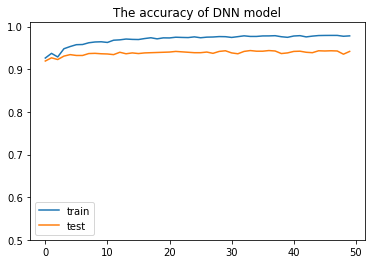

In [269]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dnn_train_accuracy)
plt.plot(dnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title("The accuracy of DNN model")
plt.legend(["train", "test"])

In [271]:
# 在test上的准确率
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/dnn")
    
    total_correct = 0
    acc = sess.run(accuracy,
                    feed_dict={inputs: x_test_tokens, 
                                targets: y_test})
    total_correct += acc
    print("The DNN model accuracy on test set: {:.2f}%".format(100* total_correct / x_test_tokens.shape[0]))

INFO:tensorflow:Restoring parameters from checkpoints/dnn
The DNN model accuracy on test set: 94.19%


# RNN模型

## 构建模型图

In [272]:
# 清空图
tf.reset_default_graph()

In [273]:
# 定义网络超参数
HIDDEN_SIZE = 512
LEARNING_RATE = 0.001
KEEP_PROB = 0.5
EPOCHES = 50
BATCH_SIZE = 256

In [274]:
with tf.name_scope("rnn"):
    # placeholders
    with tf.name_scope("placeholders"):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, 20), name="inputs")
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="targets")
    
    # embeddings
    with tf.name_scope("embeddings"):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False, name="embedding_matrix")
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name="embed")
    
    # model
    with tf.name_scope("model"):
        # 构造lstm单元
        lstm = tf.contrib.rnn.LSTMCell(HIDDEN_SIZE, initializer=tf.random_uniform_initializer(-0.1, 0.1, seed=123))
        # 添加dropout
        drop_lstm = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=KEEP_PROB)
        _, lstm_state = tf.nn.dynamic_rnn(drop_lstm, embed, dtype=tf.float32)
        
        # 输出层权重
        W = tf.Variable(tf.truncated_normal((HIDDEN_SIZE, 1), mean=0.0, stddev=0.1), name="W")
        b = tf.Variable(tf.zeros(1), name="b")
        
        logits = tf.add(tf.matmul(lstm_state.h, W), b)
        outputs = tf.nn.sigmoid(logits, name="outputs")
        
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
    
    # optimizer
    with tf.name_scope("optimizer"):
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    # evaluation
    with tf.name_scope("evaluation"):
        correct_preds = tf.equal(tf.cast(tf.greater(outputs, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

## 训练模型

In [275]:
# 存储准确率
rnn_train_accuracy = []
rnn_test_accuracy = []

In [276]:
saver = tf.train.Saver()

In [277]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./graphs/rnn", tf.get_default_graph())
    n_batches = int(x_train.shape[0] / BATCH_SIZE)
    
    for epoch in range(EPOCHES):
        total_loss = 0
        for x_batch, y_batch in get_batch(x_train_tokens, y_train):
            _, l = sess.run([optimizer, loss],
                            feed_dict={inputs: x_batch, 
                                       targets: y_batch})
            total_loss += l
        
        train_corrects = sess.run(accuracy, feed_dict={inputs: x_train_tokens, targets: y_train})
        train_acc = train_corrects / x_train_tokens.shape[0]
        rnn_train_accuracy.append(train_acc)

        test_corrects = sess.run(accuracy, feed_dict={inputs: x_test_tokens, targets: y_test})
        test_acc = test_corrects / x_test_tokens.shape[0]
        rnn_test_accuracy.append(test_acc)

        
        print("Training epoch: {}, Train loss: {:.4f}, Train accuracy: {:.4f}, Test accuracy: {:.4f}".format(epoch + 1, 
                                                                                                             total_loss / n_batches,
                                                                                                             train_acc,
                                                                                                             test_acc))
    
    saver.save(sess, "checkpoints/rnn")
    writer.close()

Training epoch: 1, Train loss: 0.2457, Train accuracy: 0.9384, Test accuracy: 0.9188
Training epoch: 2, Train loss: 0.1608, Train accuracy: 0.9472, Test accuracy: 0.9273
Training epoch: 3, Train loss: 0.1361, Train accuracy: 0.9538, Test accuracy: 0.9298
Training epoch: 4, Train loss: 0.1254, Train accuracy: 0.9524, Test accuracy: 0.9313
Training epoch: 5, Train loss: 0.1164, Train accuracy: 0.9617, Test accuracy: 0.9368
Training epoch: 6, Train loss: 0.1071, Train accuracy: 0.9576, Test accuracy: 0.9288
Training epoch: 7, Train loss: 0.1113, Train accuracy: 0.9556, Test accuracy: 0.9253
Training epoch: 8, Train loss: 0.1050, Train accuracy: 0.9611, Test accuracy: 0.9298
Training epoch: 9, Train loss: 0.0980, Train accuracy: 0.9665, Test accuracy: 0.9353
Training epoch: 10, Train loss: 0.0927, Train accuracy: 0.9587, Test accuracy: 0.9283
Training epoch: 11, Train loss: 0.0977, Train accuracy: 0.9716, Test accuracy: 0.9363
Training epoch: 12, Train loss: 0.0838, Train accuracy: 0.9716,

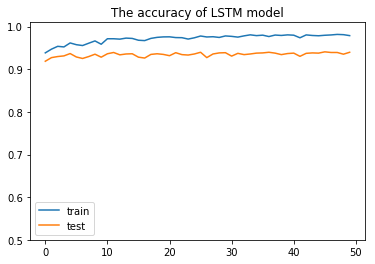

In [278]:
plt.plot(rnn_train_accuracy)
plt.plot(rnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title("The accuracy of LSTM model")
plt.legend(["train", "test"])

In [279]:
# 在test上的准确率
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/rnn")
    
    total_correct = sess.run(accuracy,
                             feed_dict={inputs: x_test_tokens, targets: y_test})

    print("The LSTM model accuracy on test set: {:.2f}%".format(100* total_correct / x_test_tokens.shape[0]))

INFO:tensorflow:Restoring parameters from checkpoints/rnn
The LSTM model accuracy on test set: 93.98%


# CNN模型

In [49]:
# 我在这里定义了5种filter，每种100个
filters_size = [2, 3, 4, 5, 6]
num_filters = 100
# 超参数
BATCH_SIZE = 256
EPOCHES = 50
LEARNING_RATE = 0.001
L2_LAMBDA = 10
KEEP_PROB = 0.8

In [50]:
with tf.name_scope("cnn"):
    with tf.name_scope("placeholders"):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, 20), name="inputs")
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="targets")
    
    # embeddings
    with tf.name_scope("embeddings"):
        embedding_matrix = tf.Variable(initial_value=static_embeddings, trainable=False, name="embedding_matrix")
        embed = tf.nn.embedding_lookup(embedding_matrix, inputs, name="embed")
        # 添加channel维度
        embed_expanded = tf.expand_dims(embed, -1, name="embed_expand")
    
    # 用来存储max-pooling的结果
    pooled_outputs = []

    # 迭代多个filter
    for i, filter_size in enumerate(filters_size):
        with tf.name_scope("conv_maxpool_%s" % filter_size):
            filter_shape = [filter_size, EMBEDDING_SIZE, 1, num_filters]
            W = tf.Variable(tf.truncated_normal(filter_shape, mean=0.0, stddev=0.1), name="W")
            b = tf.Variable(tf.zeros(num_filters), name="b")

            conv = tf.nn.conv2d(input=embed_expanded, 
                                 filter=W, 
                                 strides=[1, 1, 1, 1], 
                                 padding="VALID",
                                 name="conv")

            # 激活
            a = tf.nn.relu(tf.nn.bias_add(conv, b), name="activations")
            # 池化
            max_pooling = tf.nn.max_pool(value=a, 
                                    ksize=[1, SENTENCE_LIMIT_SIZE - filter_size + 1, 1, 1],
                                    strides=[1, 1, 1, 1],
                                    padding="VALID",
                                    name="max_pooling")
            pooled_outputs.append(max_pooling)
    
    # 统计所有的filter
    total_filters = num_filters * len(filters_size)
    total_pool = tf.concat(pooled_outputs, 3)
    flattend_pool = tf.reshape(total_pool, (-1, total_filters))
    
    # dropout
    with tf.name_scope("dropout"):
        dropout = tf.nn.dropout(flattend_pool, KEEP_PROB)
    
    # output
    with tf.name_scope("output"):
        W = tf.get_variable("W", shape=(total_filters, 1), initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(1), name="b")
        
        logits = tf.add(tf.matmul(dropout, W), b)
        predictions = tf.nn.sigmoid(logits, name="predictions")
    
    # loss
    with tf.name_scope("loss"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
        loss = loss + L2_LAMBDA * tf.nn.l2_loss(W)
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    # evaluation
    with tf.name_scope("evaluation"):
        correct_preds = tf.equal(tf.cast(tf.greater(predictions, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

## 训练模型

In [51]:
# 存储准确率
cnn_train_accuracy = []
cnn_test_accuracy = []

In [52]:
saver = tf.train.Saver()

In [55]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./graphs/cnn", tf.get_default_graph())
    n_batches = int(x_train.shape[0] / BATCH_SIZE)
    
    for epoch in range(EPOCHES):
        total_loss = 0
        for x_batch, y_batch in get_batch(x_train_tokens, y_train):
            _, l = sess.run([optimizer, loss],
                            feed_dict={inputs: x_batch, 
                                       targets: y_batch})
            total_loss += l
        
        train_corrects = sess.run(accuracy, feed_dict={inputs: x_train_tokens, targets: y_train})
        train_acc = train_corrects / x_train_tokens.shape[0]
        cnn_train_accuracy.append(train_acc)
        
        test_corrects = sess.run(accuracy, feed_dict={inputs: x_test_tokens, targets: y_test})
        test_acc = test_corrects / x_test_tokens.shape[0]
        cnn_test_accuracy.append(test_acc)
        
        print("Training epoch: {}, Training loss: {:.4f}, Train accuracy: {:.4f}, Test accuracy: {:.4f}".format(epoch + 1, 
                                                                                                                total_loss / n_batches,
                                                                                                                train_acc,
                                                                                                               test_acc))
    
    saver.save(sess, "checkpoints/cnn")
    writer.close()

Training epoch: 1, Training loss: 6.0956, Train accuracy: 0.9275, Test accuracy: 0.9163
Training epoch: 2, Training loss: 1.5670, Train accuracy: 0.9278, Test accuracy: 0.9163
Training epoch: 3, Training loss: 0.5680, Train accuracy: 0.9224, Test accuracy: 0.9073
Training epoch: 4, Training loss: 0.3867, Train accuracy: 0.9242, Test accuracy: 0.9098
Training epoch: 5, Training loss: 0.3302, Train accuracy: 0.9200, Test accuracy: 0.9068
Training epoch: 6, Training loss: 0.3030, Train accuracy: 0.9294, Test accuracy: 0.9118
Training epoch: 7, Training loss: 0.2837, Train accuracy: 0.9289, Test accuracy: 0.9193
Training epoch: 8, Training loss: 0.2675, Train accuracy: 0.9305, Test accuracy: 0.9173
Training epoch: 9, Training loss: 0.2596, Train accuracy: 0.9305, Test accuracy: 0.9188
Training epoch: 10, Training loss: 0.2505, Train accuracy: 0.9332, Test accuracy: 0.9268
Training epoch: 11, Training loss: 0.2442, Train accuracy: 0.9345, Test accuracy: 0.9208
Training epoch: 12, Training l

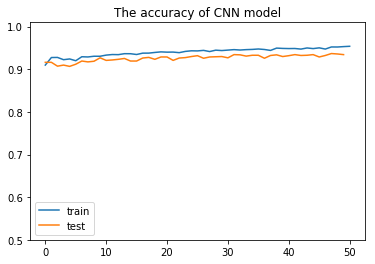

In [58]:
plt.plot(cnn_train_accuracy)
plt.plot(cnn_test_accuracy)
plt.ylim(ymin=0.5, ymax=1.01)
plt.title("The accuracy of CNN model")
plt.legend(["train", "test"])

In [61]:
# 在test上的准确率
with tf.Session() as sess:
    saver.restore(sess, "checkpoints/cnn")
    
    total_correct = sess.run(accuracy,
                             feed_dict={inputs: x_test_tokens, targets: y_test})

    print("The LSTM model accuracy on test set: {:.2f}%".format(100 * total_correct / x_test_tokens.shape[0]))

INFO:tensorflow:Restoring parameters from checkpoints/cnn
The LSTM model accuracy on test set: 93.88%


# CNN multi-channel

In [62]:
# 清空图
tf.reset_default_graph()

In [63]:
# 我在这里定义了5种filter，每种100个
filters_size = [2, 3, 4, 5, 6]
num_filters = 100
# 超参数
BATCH_SIZE = 256
EPOCHES = 8
LEARNING_RATE = 0.001
L2_LAMBDA = 10
KEEP_PROB = 0.8

In [64]:
with tf.name_scope("cnn_multichannels"):
    with tf.name_scope("placeholders"):
        inputs = tf.placeholder(dtype=tf.int32, shape=(None, 20), name="inputs")
        targets = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="targets")
    # embeddings
    with tf.name_scope("embeddings"):
        # static embeddings
        static_embedding_matrix = tf.Variable(initial_value=static_embeddings, 
                                              trainable=False, 
                                              name="static_embedding_matrix")
        static_embed = tf.nn.embedding_lookup(static_embedding_matrix, inputs, name="static_embed")
        static_embed_expanded = tf.expand_dims(static_embed, -1, name="static_embed_expand")
        
        # non-static embeddings
        dynamic_embedding_matrix = tf.Variable(tf.random_normal(shape=(VOCAB_SIZE, EMBEDDING_SIZE), stddev=0.1), 
                                               trainable=True, 
                                               name="dynamic_embedding_matrix")
        dynamic_embed = tf.nn.embedding_lookup(dynamic_embedding_matrix, inputs, name="dynamic_embed")
        dynamic_embed_expanded = tf.expand_dims(dynamic_embed, -1, name="dynamic_embed_expand")
        
        # stack
        embed_expanded = tf.concat((static_embed_expanded, dynamic_embed_expanded), axis=-1, name="embed_expanded")
    
    pooled_outputs = []

    # 迭代多个filter
    for i, filter_size in enumerate(filters_size):
        with tf.name_scope("conv_maxpool_%s" % filter_size):
            # 注意这里filter的channel要指定为2
            filter_shape = [filter_size, EMBEDDING_SIZE, 2, num_filters]
            W = tf.Variable(tf.truncated_normal(filter_shape, mean=0.0, stddev=0.1), name="W")
            b = tf.Variable(tf.zeros(num_filters), name="b")

            conv = tf.nn.conv2d(input=embed_expanded, 
                                 filter=W, 
                                 strides=[1, 1, 1, 1], 
                                 padding="VALID",
                                 name="conv")

            # 激活
            a = tf.nn.relu(tf.nn.bias_add(conv, b), name="activations")
            # 池化
            max_pooling = tf.nn.max_pool(value=a, 
                                    ksize=[1, SENTENCE_LIMIT_SIZE - filter_size + 1, 1, 1],
                                    strides=[1, 1, 1, 1],
                                   padding="VALID",
                                   name="max_pooling")
            pooled_outputs.append(max_pooling)
        
    total_filters = num_filters * len(filters_size)
    total_pool = tf.concat(pooled_outputs, 3)
    flattend_pool = tf.reshape(total_pool, (-1, total_filters))
    
    with tf.name_scope("dropout"):
        dropout = tf.nn.dropout(flattend_pool, KEEP_PROB)
    
    with tf.name_scope("output"):
        W = tf.get_variable("W", shape=(total_filters, 1), initializer=tf.contrib.layers.xavier_initializer())
        b = tf.Variable(tf.zeros(1), name="b")
        
        logits = tf.add(tf.matmul(dropout, W), b)
        predictions = tf.nn.sigmoid(logits, name="predictions")
    
    with tf.name_scope("loss"):
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=targets, logits=logits))
        loss = loss + L2_LAMBDA * tf.nn.l2_loss(W)
        optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    with tf.name_scope("evaluation"):
        correct_preds = tf.equal(tf.cast(tf.greater(predictions, 0.5), tf.float32), targets)
        accuracy = tf.reduce_sum(tf.reduce_sum(tf.cast(correct_preds, tf.float32), axis=1))

In [65]:
multi_cnn_train_accuracy = []
multi_cnn_test_accuracy = []

In [66]:
saver = tf.train.Saver()

In [69]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./graphs/multi_cnn", tf.get_default_graph())
    n_batches = int(x_train.shape[0] / BATCH_SIZE)
    
    for epoch in range(EPOCHES):
        total_loss = 0
        for x_batch, y_batch in get_batch(x_train_tokens, y_train):
            _, l = sess.run([optimizer, loss],
                            feed_dict={inputs: x_batch, 
                                       targets: y_batch})
            total_loss += l
        
        train_corrects = sess.run(accuracy, feed_dict={inputs: x_train_tokens, targets: y_train})
        train_acc = train_corrects / x_train_tokens.shape[0]
        multi_cnn_train_accuracy.append(train_acc)
        
        test_corrects = sess.run(accuracy, feed_dict={inputs: x_test_tokens, targets: y_test})
        test_acc = test_corrects / x_test_tokens.shape[0]
        multi_cnn_test_accuracy.append(test_acc)
        
        print("Training epoch: {}, Training loss: {:.4f}, Train accuracy: {:.4f}, Test accuracy: {:.4f}".format(epoch + 1, 
                                                                                                                total_loss / n_batches,
                                                                                                                train_acc,
                                                                                                                test_acc))
    
    saver.save(sess, "checkpoints/multi_cnn")
    writer.close()

Training epoch: 1, Training loss: 5.6591, Train accuracy: 0.9404, Test accuracy: 0.9253
Training epoch: 2, Training loss: 1.3854, Train accuracy: 0.9432, Test accuracy: 0.9288
Training epoch: 3, Training loss: 0.4620, Train accuracy: 0.9480, Test accuracy: 0.9348
Training epoch: 4, Training loss: 0.2782, Train accuracy: 0.9505, Test accuracy: 0.9343
Training epoch: 5, Training loss: 0.2174, Train accuracy: 0.9560, Test accuracy: 0.9368
Training epoch: 6, Training loss: 0.1848, Train accuracy: 0.9583, Test accuracy: 0.9358
Training epoch: 7, Training loss: 0.1643, Train accuracy: 0.9625, Test accuracy: 0.9368
Training epoch: 8, Training loss: 0.1506, Train accuracy: 0.9655, Test accuracy: 0.9409
